In [ ]:
"""
primsingrid experiments.

Main Goals: 
1. find cases of prims in grid that vary indepependently in (i) shapes (ii) sequence and (iii) location,
to then present these as experiments. 

2. Also, how often each prim occurs at each location etc.

NOTE: 
- pulls out 2-prim motifs (IN PROGRESS, ANY N-PRIM)
"""



In [2]:
from pythonlib.dataset.dataset_analy.primitives import *
from pythonlib.dataset.dataset_preprocess.primitives import *
from pythonlib.dataset.dataset import Dataset, load_dataset_daily_helper
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##### Extract dataset

In [ ]:
# # a = "Pancho"
# # e = "shapedirsequence1"
# # r = "null"

# a = "Pancho"
# e = "primsingrid2sub"
# r = "null"

# D = Dataset([])
# D.load_dataset_helper(a, e, rule=r)

# # from pythonlib.dataset.dataset_preprocess.general import preprocessDat
# # D, GROUPING, GROUPING_LEVELS, FEATURE_NAMES, SCORE_COL_NAMES = preprocessDat(D, e)

In [3]:
animal = "Pancho"
date = 220830 # ss
D = load_dataset_daily_helper(animal, date)


Searching using this string:
/home/lucast4/code/drawmonkey/expt_metadat/*220830-*Pancho.**
Found this many paths:
0
Searching using this string:
/home/lucast4/code/drawmonkey/expt_metadat_daily/*220830-*Pancho.**
Found this many paths:
1
---
/home/lucast4/code/drawmonkey/expt_metadat_daily/grammar1c-220830-Pancho.yaml
Loading this dataset Pancho grammar1c 220830
Searching using this string:
/gorilla1/analyses/database/*Pancho-*grammar1c-*220830-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/gorilla1/analyses/database/BEH/*Pancho-*grammar1c-*220830-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
1
---
/gorilla1/analyses/database/BEH/Pancho-grammar1c-220830-221015_200411
Searching using this string:
/mnt/Freiwald/kgupta/analyses/database/*Pancho-*grammar1c-*220830-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/mnt/Freiwald/kgupta/analyses/database/BEH/*Pancho-*gramma

In [4]:
SDIR = D.make_savedir_for_analysis_figures("motifs")

SAVING at:  /gorilla1/analyses/main/motifs/Pancho_grammar1c_220830


##### Clean up dataset 


In [5]:
print(D.Dat["task_kind"].value_counts())

prims_on_grid    710
Name: task_kind, dtype: int64


In [62]:
from pythonlib.dataset.dataset_analy.motifs import preprocess_dat
preprocess_dat(D)

self.Dat modified!!
SAVING at:  /gorilla1/analyses/main/grammar/Pancho_grammar1c_220830
Got these sets of blocks:  [[14], [26], [33]]
stored in self.Dat[BehClass]
0
Running D.behclass_tokens_extract_datsegs
0
trial # 0
Added this columnt to D.Dat:  success_binary
Added this columnt to D.Dat:  beh_sequence_wrong
Added this columnt to D.Dat:  beh_too_short
Added this columnt to D.Dat:  exclude_because_online_abort
TODO! _preprocess_sanity_check
DONE default alignment_rank_default
DONE default alignment_diff_default
DONE default alignment_diffindex_default
stored in self.Dat[BehClass]
0
Running D.behclass_tokens_extract_datsegs
0


In [ ]:
#### OTHER STUFF...
for i in range(len(D.Dat)):
    n1 = len(D.Dat.iloc[i]["strokes_beh"])
    n2 = len(D.Dat.iloc[i]["strokes_task"])
    if n1!=n2:
        print(i, n1, n2)

# Only tasks with 3 or 4 prims
print(len(D.Dat))

def F(x):
    nprims = len(x["Task"].Primitives)
    return nprims
from pythonlib.tools.pandastools import applyFunctionToAllRows
D.Dat = applyFunctionToAllRows(D.Dat, F, "task_nprims")

D.filterPandas({"task_nprims":[3,4]}, "modify")

print(len(D.Dat))

# only tasks where behavior was ok

fig, axes = plt.subplots(3,2, figsize=(12, 8))

list_scores = ["posterior", "frac_strokes", "beh_multiplier", "ft_decim", "numstrokes_frac"]
for sc, ax in zip(list_scores, axes.flatten()):
    D.Dat[sc].hist(bins=50, ax=ax)
    ax.set_title(sc)



print(len(D.Dat))
D.Dat = D.Dat[D.Dat["posterior"]>0.4]
D.Dat = D.Dat[D.Dat["frac_strokes"]>0.55]
D.Dat = D.Dat[D.Dat["beh_multiplier"]>0.25]
D.Dat = D.Dat[D.Dat["ft_decim"]>0.6]
D.Dat = D.Dat[D.Dat["numstrokes_frac"]>-1.4]
print(len(D.Dat))

# Reset index
D.Dat = D.Dat.reset_index(drop=True)

# plot example trials with failures

# 1) print indices
bm.Dat[(bm.Dat["success_binary"]==False) & (bm.Dat["exclude_because_online_abort"]==False)].index

# 2) plot
bm.Dat["success_binary"].value_counts()
ind = 39
D.sequence_extract_beh_and_task(ind, True)
bm.Dat.iloc[ind]["parsesdict"]

### Collect groups of (2-prim) [in progress: generalizing to any n prims]
motifs across all trials (e.g., all cases where same sequence of locations but different prims)

Found this many motifs:  72
This many instances per motif_features:  [3, 3, 1, 1, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 2, 4, 4, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Looking for common sequences across tasks (e..,g, set of all with same sequence for a given motif)

##### Pick out groups with multiple instances and plot all of them as drawings.


In [36]:
MC.preprocess_motifgroups_extract()
MC.print_motifgroup_summary()

##### Wrapper to plot all drawingsm

Found this many motifs:  41
This many instances per motif_features:  [7, 2, 11, 5, 1, 7, 2, 6, 1, 2, 4, 2, 2, 2, 1, 5, 2, 5, 4, 4, 2, 2, 3, 1, 1, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#0 -- IGNORE
#1 -- IGNORE
#2 -- IGNORE
#3 -- IGNORE
#4 -- IGNORE
#5 -- IGNORE
#6 -- IGNORE
#7 -- IGNORE
#8 -- IGNORE
#9 -- IGNORE
#10 -- IGNORE
#11 -- IGNORE
#12 -- IGNORE
#13 -- IGNORE
#14 -- IGNORE
#15 -- IGNORE
#16 -- IGNORE
#17 -- IGNORE
#18 -- IGNORE
#19 -- IGNORE
#20 -- IGNORE


/gorilla1/code/pythonlib/pythonlib/dataset/dataset_analy/motifs.py:105: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*SIZE, nrows*SIZE),


#21 -- IGNORE
#22 -- IGNORE
#23 -- IGNORE


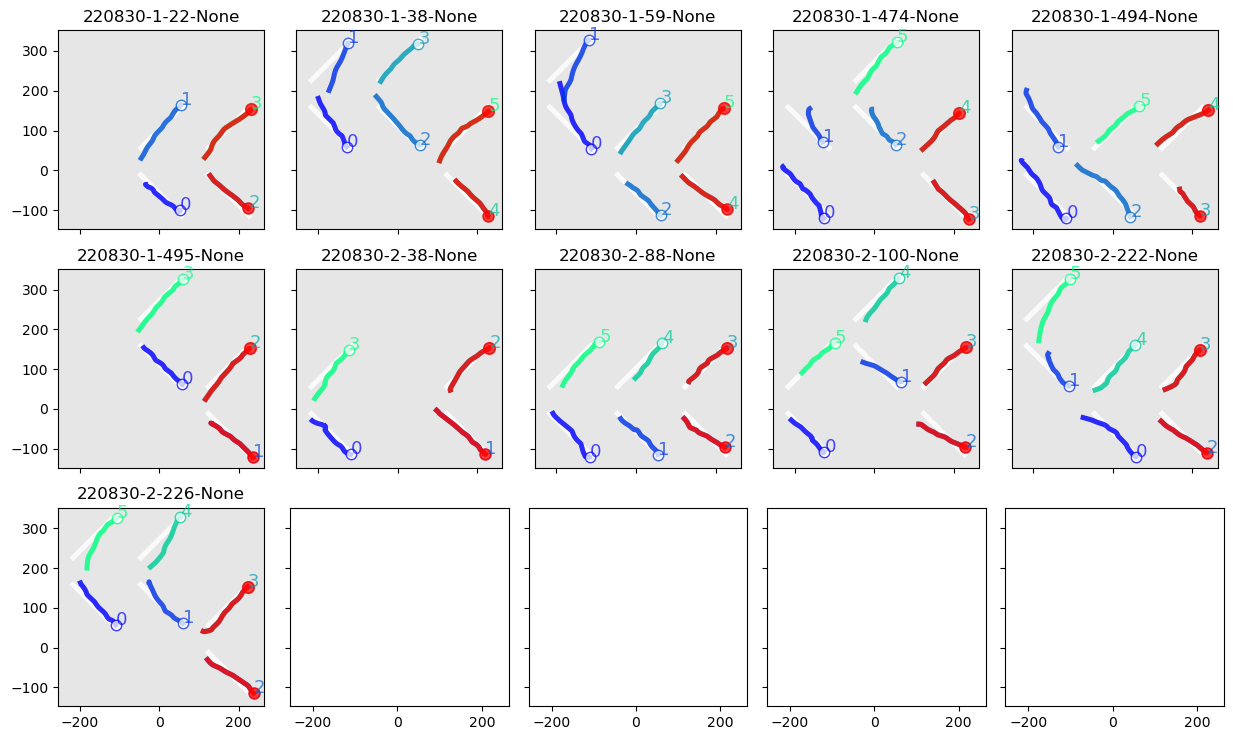

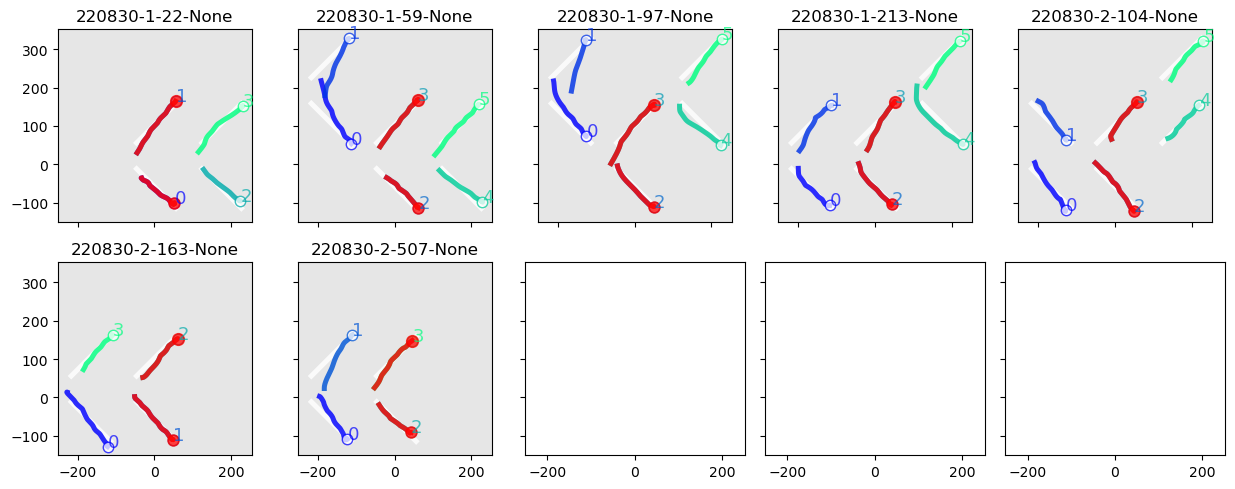

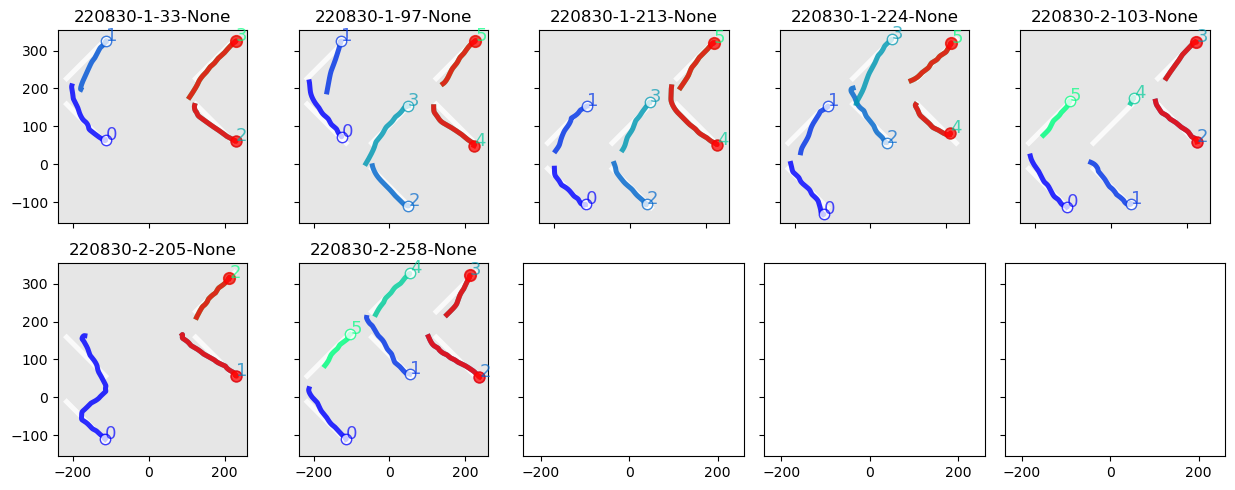

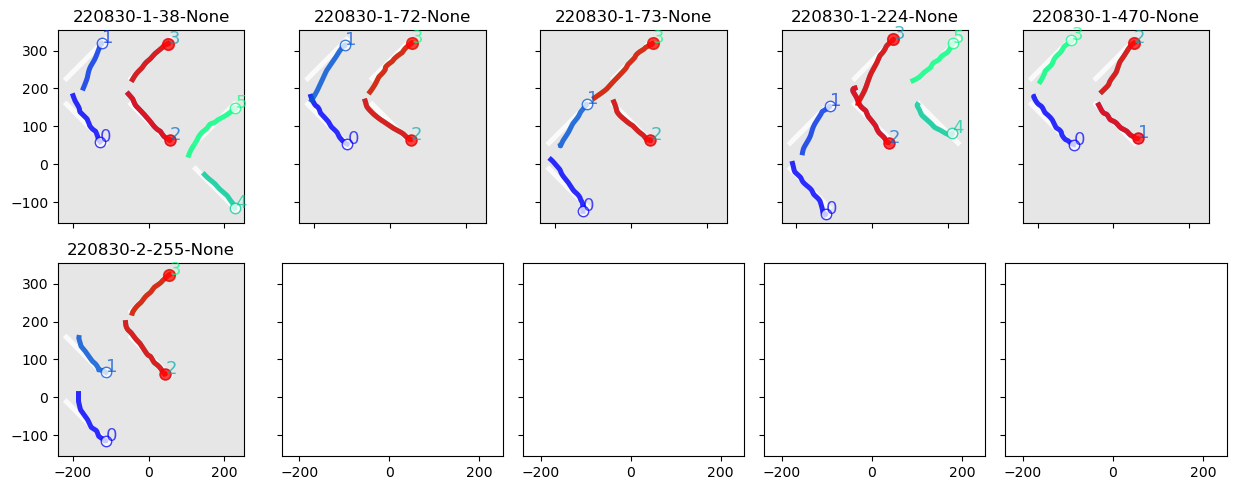

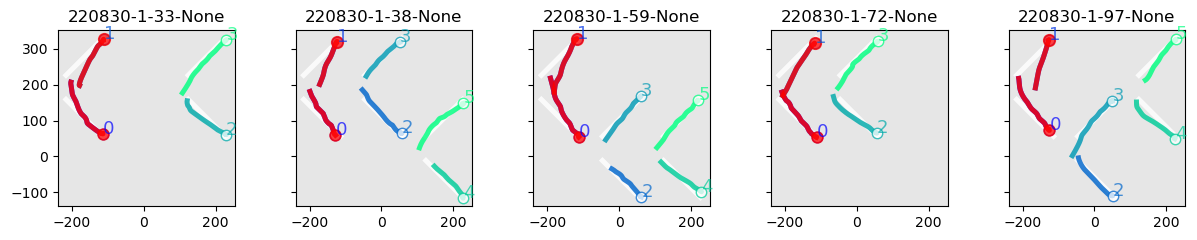

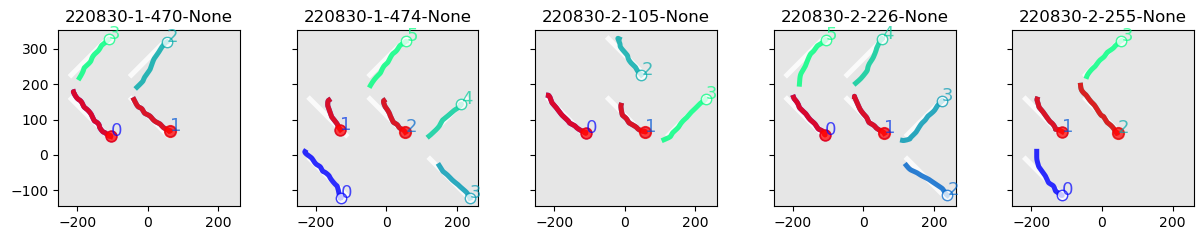

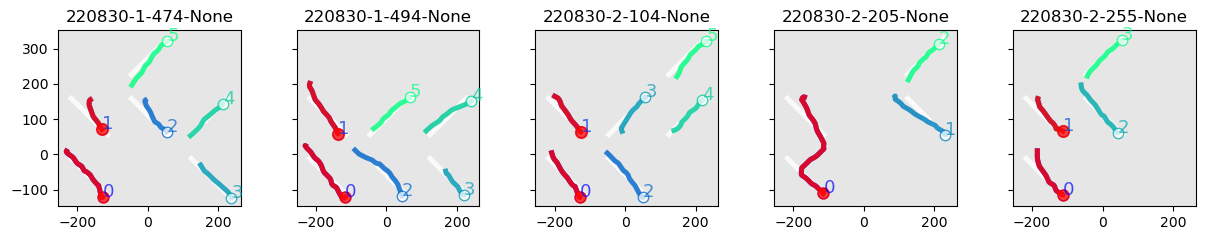

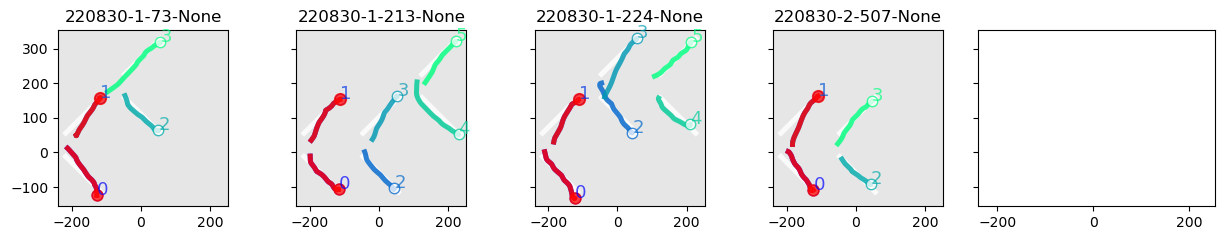

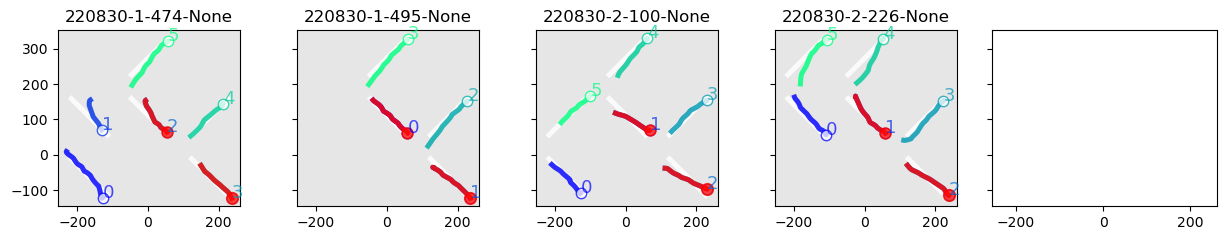

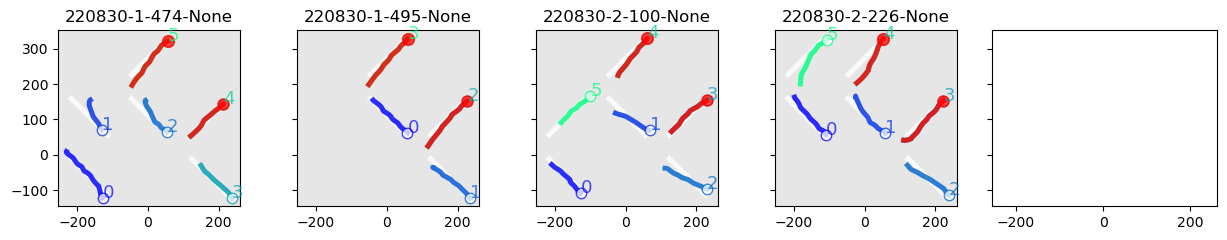

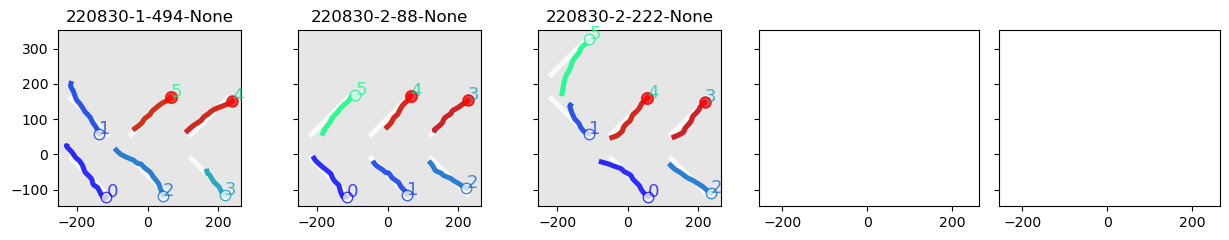

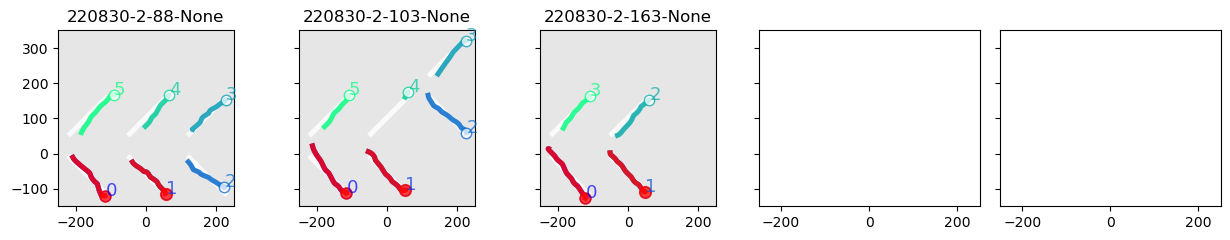

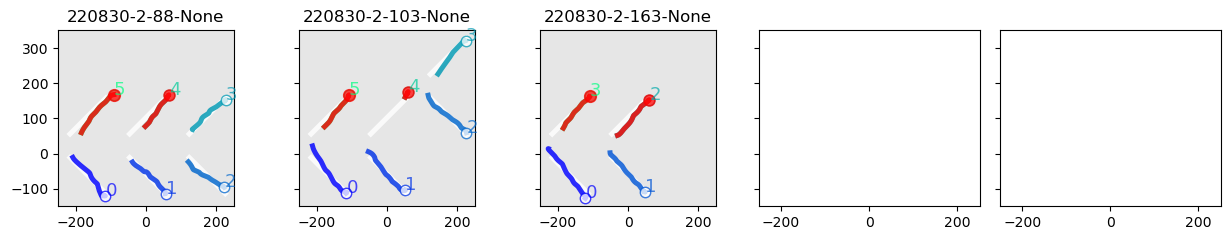

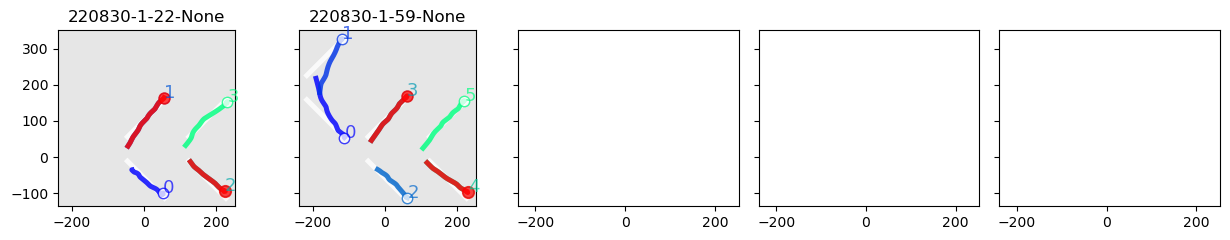

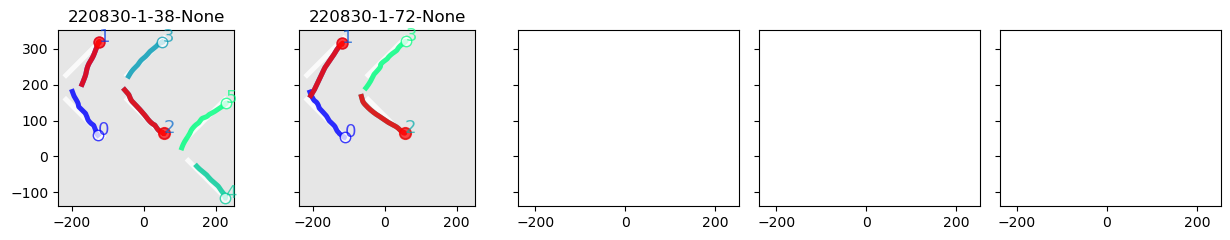

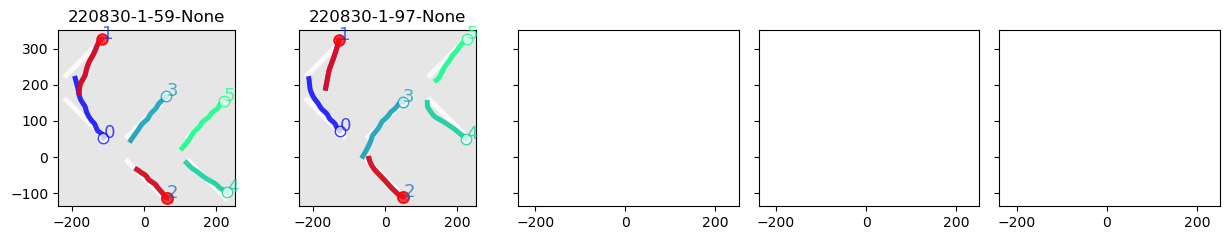

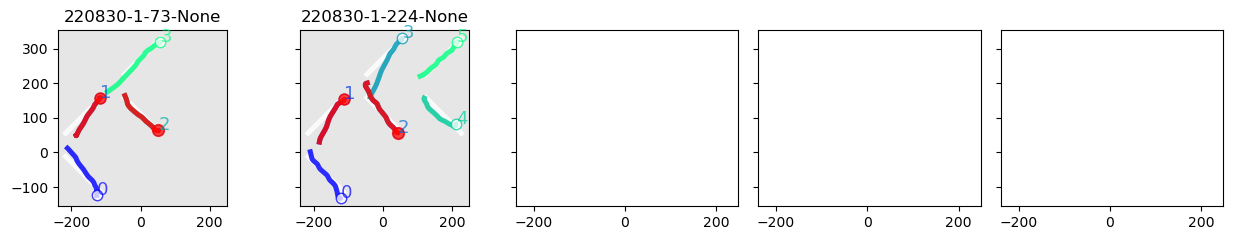

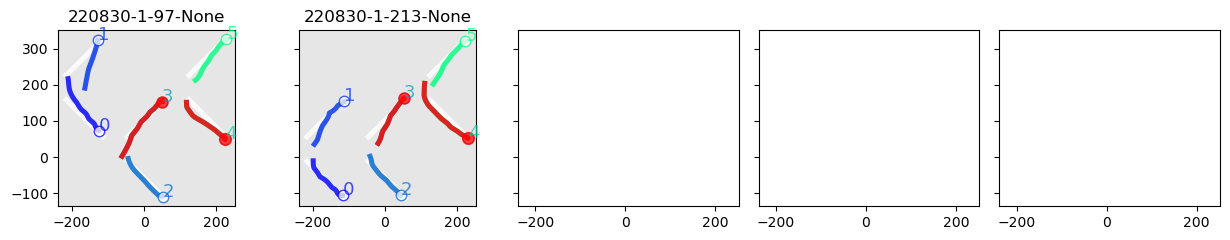

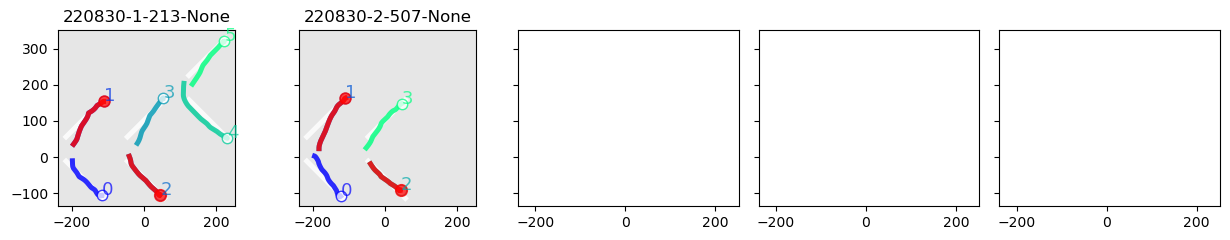

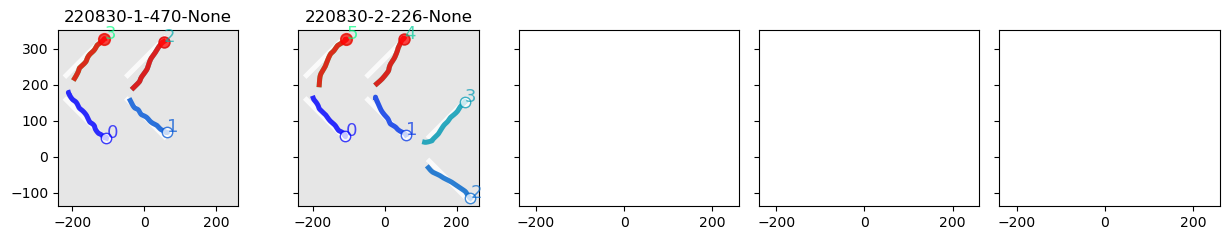

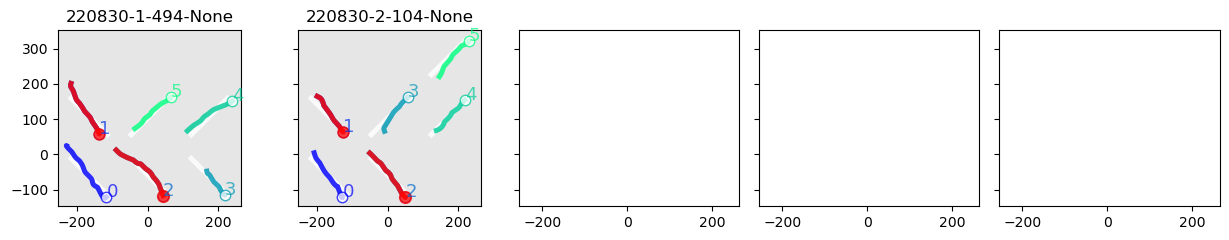

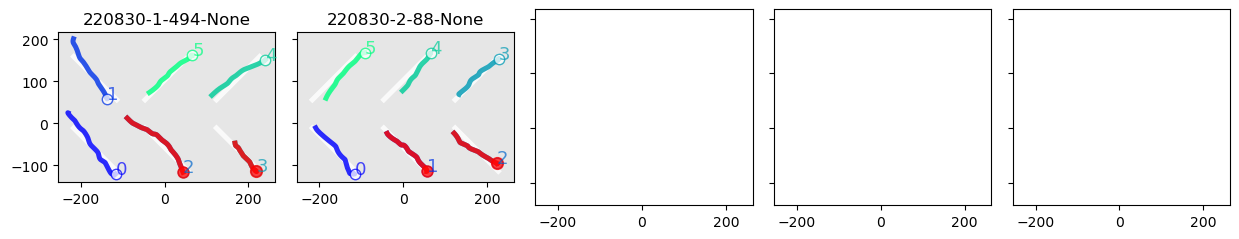

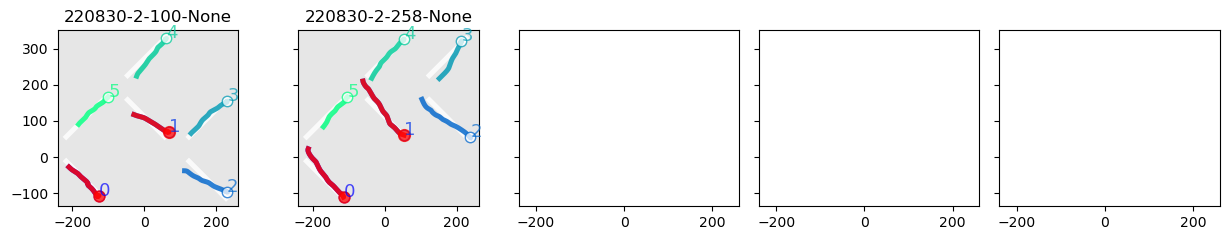

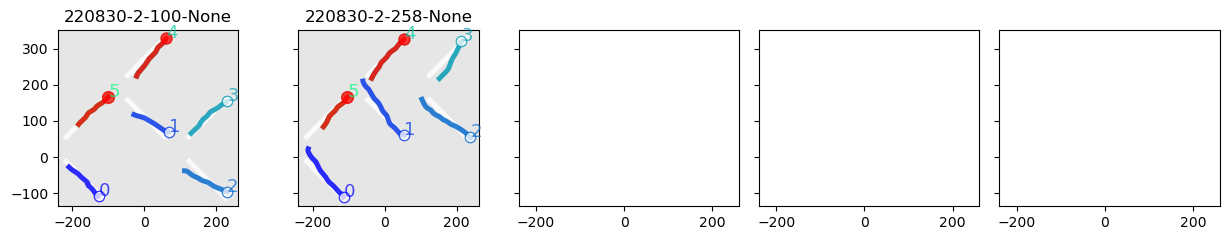

In [71]:
from pythonlib.dataset.dataset_analy.motifs import plotwrapper_drawings_trials_spanning_feature
plotwrapper_drawings_trials_spanning_feature(D, 2, "/tmp")

## ABOVE: 2/1/23
## BELOW: STUFF OLDER THAN 2/1/23

##### Other stuff...

In [ ]:
ind = inds_trials_all[0]
Beh = D.Dat.iloc[ind]["BehClass"]
Beh.alignsim_plot_summary()


In [ ]:
# Find any trials that happen to be in multiple groups

# - invert the data: for each trial, get what motifgroups it is in
DatTrials = {}

for which_group in list_group_kind:
    dat = DatGroups[which_group]
    for d in dat:
        motifgroup = d["key"]
        idxs_all, list_motifs_all, _ = get_inds_this_motifgroup(DatGroups, which_group, 
                                                                    motifs_all_dict, motifgroup)
        inds_trials_all = [x[0] for x in idxs_all]
        inds_strokenums_all = [x[1] for x in idxs_all]
        
        # For each trial, save this iformation
        for trial, strokenum, motif in zip(inds_trials_all, inds_strokenums_all, list_motifs_all):
            item = (which_group, motifgroup, motif, strokenum)
            if trial in DatTrials.keys():
                DatTrials[trial].append(item)
            else:
                DatTrials[trial] = [item]
                
                
print("got these trials: ", sorted(DatTrials.keys()))


In [ ]:
# For this trial, what groups is it in.
indtrial = 93
for x in DatTrials[indtrial]:
    print(x)
    
    print(x[0])

##### Collect trials that maximizes 

In [ ]:
from pythonlib.dataset.dataset_analy.datseg_motifs import *
which_group = "diff_sequence"
DatTrials, DatGroupsUsedSimple, motifgroups_inds_ordered = expt_extract_motifgroups_to_regenerate(which_group, DatGroups, motifs_all_dict)

In [ ]:
# print summary of extracted groups
print_summary_motifgroups(DatGroups, which_group, motifgroups_inds_ordered)


In [ ]:
# Pick out one case for each group until reach desired number of trials
# LIST_GROUP_KIND_TOGET = [g for g in list_group_kind if g not in ["same", "diff_prims"]]
LIST_GROUP_KIND_TOGET = ["diff_sequence", "diff_sequence", "diff_location"]

# PARAMS
# n_trials_get = 40 # how many unqiue trials to pull out. will stop at or slightly higher than this
n_chars_get = 20
def num_trials(DatTrials):
    """ Returns number of trials inputed into DatTrials so far
    PARAMS:
    - DatTrials, dict, where keys are ints (trials) and item is list of info tuples, where
    info tuple =  (which_group, motifgroup, motif, strokenum)
    """
    return len(DatTrials.keys())

# 2) Collect trials
ind = 0
DatTrials = {}
DatGroupsUsedSimple = {which_group:[] for which_group in list_group_kind} # keep track of which motifgroups are used

CHARACTERS_USED = []
def num_unique_chars():
    return len(list(set(CHARACTERS_USED)))

# -- collect for each whichgrou
dgusedsimple_all = {}
for which_group in LIST_GROUP_KIND_TOGET:
    _, dgusedsimple, _= expt_extract_motifgroups_to_regenerate(
        which_group, DatGroups, motifs_all_dict)
    dgusedsimple_all[which_group] = dgusedsimple[which_group]

inds_get_dict = {which_group:0 for which_group in LIST_GROUP_KIND_TOGET}

while num_unique_chars() < n_chars_get:
# while num_trials(DatTrials) < n_trials_get:
    for which_group in LIST_GROUP_KIND_TOGET:
            
        ind = inds_get_dict[which_group]
        inds_idxs_all = dgusedsimple_all[which_group][ind]["inds_idxs_all"]
        list_motifs_all = dgusedsimple_all[which_group][ind]["list_motifs_all"]
        motifgroup = dgusedsimple_all[which_group][ind]["motifgroup"]
        
        # For each trial, save this iformation
        inds_trials_all = [x[0] for x in inds_idxs_all]
        inds_strokenums_all = [x[1] for x in inds_idxs_all]
        for trial, strokenum, motif in zip(inds_trials_all, inds_strokenums_all, list_motifs_all):
            item = (which_group, motifgroup, motif, strokenum)
            if trial in DatTrials.keys():
                DatTrials[trial].append(item)
            else:
                DatTrials[trial] = [item]
        
            # Track which characters used
            for trial in inds_trials_all:
                CHARACTERS_USED.append(D.Dat.iloc[trial]["character"])            
        
        print("***", which_group, "| num chars so far = ", len(set(CHARACTERS_USED)))
        # Track which groups are used
#         datdict = extract_motifgroup_dict(DatGroups, which_group, ind)
#         DatGroupsUsed[which_group].append(datdict)%%!
        ntrials = len(inds_idxs_all)
        DatGroupsUsedSimple[which_group].append({"motifgroup":motifgroup, "ntrials":ntrials, "inds_idxs_all":inds_idxs_all, "list_motifs_all":list_motifs_all})
        print(ind, num_trials(DatTrials))
#         ind+=1
        inds_get_dict[which_group] +=1

In [ ]:
print(len(CHARACTERS_USED))
print(len(set(CHARACTERS_USED)))
CHARACTERS_USED_UNIQUE = list(set(CHARACTERS_USED))

In [ ]:
# Take one trial per character
from pythonlib.tools.pandastools import extract_trials_spanning_variable
trials_used, chars_used = extract_trials_spanning_variable(D.Dat, "character", CHARACTERS_USED_UNIQUE)
print(trials_used)
print(chars_used)

In [ ]:
def print_summarize(DatGroups, ignore_print_motifgroup=True):
    list_n = []
    print("Number of motifs(trials) for each motifgroup:")
    for which_group in list_group_kind:
        Dat = DatGroups[which_group]
        print("===== ", which_group)
        for datdict in Dat:
            if ignore_print_motifgroup:
                print(f"[{datdict['ntrials']}]")
            else:
                print(f"[{datdict['ntrials']}] {datdict['motifgroup']}")
            list_n.append(datdict['ntrials'])
    print("This many total motif groups:")
    print(len(list_n))
    print("This many motifs/trials (counting multiple even if redundant:")
    print(sum(list_n))
    print("On average this many motifs(trials) per group:")
    print(sum(list_n)/len(list_n))
    print("This many unique tasks(trials):")
    print(len(DatTrials.keys()))
        
print_summarize(DatGroupsUsedSimple, True)
        

### SANITY CHECK - regenrate dataset with just these trials, and rerun motif checking analysis

In [ ]:
Dsub = D.subsetDataset(trials_used)

# Check only one trial per char
print(Dsub.Dat["character"].value_counts())

WHICH_DATSEGS = "task" # whether to use "task" or "beh" aligned
if e=="primsingrid2":
    shapes_to_ignore = []
else:
    shapes_to_ignore = ['squiggle3-2-0', 'V-2-0' ,'Lcentered-4-0']
motifs_all_dict = generate_dict_of_all_used_motifs(Dsub, WHICH_DATSEGS = "task", shapes_to_ignore=shapes_to_ignore)

DatGroups, list_group_kind = generate_motifgroup_data(motifs_all_dict)

In [ ]:
# Summarize, how many groups found and how many trials each
do_print_shapes = True

for which_group in list_group_kind:
    print(" === ", which_group)
    print_summary_motifgroups(DatGroups, which_group, None)
        

In [ ]:
# Distribution of shapes used in this dataset
from pythonlib.datsaet.

### Convert each trial into a plan that can be used in matlab (dragmonkey) to generate tasks

In [ ]:
SDIR = "/data2/analyses/main/resaved_tasks_for_matlab"
for indtrial in trials_used:
    SDIR, subdir = D.save_task_for_dragmonkey(indtrial)

# Also save the Dataset
D.save_state(SDIR, subdir, False)

# Also save state of motifs data
import pickle
path = f"{SDIR}/{subdir}/DAT.pkl"

DAT = {
    "DatGroups":DatGroups,
    "DatGroupsUsedSimple":DatGroupsUsedSimple,
    "DatTrials":DatTrials,
    "motifs_all_dict":motifs_all_dict,
    "trials_used":trials_used
}

with open(path, "wb") as f:
    pickle.dump(DAT, f)
    
print("Saved all data to: ", path)

### Which prims are performed the most accurately?

In [ ]:
from pythonlib.dataset.dataset_strokes import DatStrokes

DS = DatStrokes(D)


In [ ]:
# For each shape, plot multiple trials of drawings
task_kind = "prims_on_grid"
key_subplots = "shape_oriented"
key_to_extract_stroke_variations_in_single_subplot = "gridloc"
DS.plot_egstrokes_grouped_in_subplots(task_kind, key_subplots,
                                     key_to_extract_stroke_variations_in_single_subplot, 3, color_by=None)


In [ ]:
# Use this to decide which prims to ignore
shapes_to_ignore = ['squiggle3-2-0', 'V-2-0' ,'Lcentered-4-0']


### Find motifs that exist across different epochs/rules

## OLD

#### Given stroke motif, find it

In [ ]:
token1 = {'shape': 'line-4',
  'shape_oriented': 'line-4',
  'gridloc': (1, -1),
  'rel_from_prev': 'start',
  'rel_to_next': 'far'}
token2 = {'shape': 'squiggle3-2',
  'shape_oriented': 'squiggle3-2',
  'gridloc': (0, 1),
  'rel_from_prev': 'far',
  'rel_to_next': 'far'}

In [ ]:
# For each taskstroke, get its associated beh
Beh.alignsim_find_motif_in_beh_specific([token1, token2])
Beh.alignsim_find_motif_in_beh_specific_byindices([2])